## Set up and Imports

In [204]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.layers import InputLayer,ConvLSTM2D, Conv2D
from keras.layers import BatchNormalization
from keras.activations import tanh
from keras.layers import Reshape
from tensorflow.keras import layers
import datetime as dt
from tensorflow import keras
import sqlite3
import seaborn as sns

## Read Data and formatting

In [2]:
df = pd.read_csv(r"C:\Users\ps\PycharmProjects\pythonProject\feature_df.csv")
# Setting Up
df = df.iloc[:-1, :]
df['IV_return_due_1'] = np.log(df['IV_return_due_1'])

In [3]:
df

,target_date,Skew_25D_due_1,Skew_25D_due_2,Skew_25D_due_3,Skew_10D_due_1,Skew_10D_due_2,Skew_10D_due_3,Kurtosis_25D_due_1,Kurtosis_25D_due_2,Kurtosis_25D_due_3,Kurtosis_10D_due_1,Kurtosis_10D_due_2,Kurtosis_10D_due_3,ATMVOL_due_1,ATMVOL_due_2,ATMVOL_due_3,next_ATMVOL_due_1,IV_return_due_1
0,20160128,0.975415,0.996066,0.947039,0.988022,1.012953,0.961269,1.002033,1.004985,1.024215,1.001257,1.008953,1.018659,0.422039,0.403719,0.376620,0.407104,-0.036029
1,20160129,1.122882,1.004805,0.949886,1.033338,1.027179,0.958050,1.010114,1.006217,1.056335,0.997495,1.013713,1.009244,0.407104,0.402194,0.373117,0.354085,-0.139531
2,20160201,1.041328,0.987966,0.918007,1.005593,1.019239,0.971125,1.022640,1.000340,0.998275,0.998762,0.992401,0.995575,0.354085,0.386551,0.380105,0.330419,-0.069175
3,20160202,1.012441,0.950256,0.982237,1.022222,0.982544,1.024522,1.017235,1.007789,1.005066,1.001951,0.993319,0.958205,0.330419,0.368654,0.376598,0.333515,0.009326
4,20160203,1.021533,0.953320,0.900281,1.008441,0.993267,0.969278,1.028413,1.022188,0.987491,1.010964,1.008631,0.958547,0.333515,0.359272,0.370518,0.341932,0.024922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,20230406,1.022014,1.017788,0.999960,1.023026,1.015247,1.005050,1.002014,1.014630,1.018022,1.000944,1.007092,1.000313,0.161652,0.167877,0.172263,0.151567,-0.064421
1401,20230407,1.023743,1.036903,0.988937,1.010624,1.013452,1.000846,1.019071,1.027883,1.016367,1.002466,1.001801,1.006544,0.151567,0.162653,0.169434,0.146740,-0.032362
1402,20230410,1.010691,1.011729,1.000068,1.000555,1.016480,0.992200,1.018069,1.007341,1.017692,1.003411,1.003733,1.004768,0.146740,0.160837,0.167362,0.143034,-0.025585
1403,20230411,1.027370,1.021349,1.015298,1.001869,1.012510,1.002814,1.009628,1.001533,1.013855,0.999685,0.998667,1.001311,0.143034,0.158107,0.165860,0.140519,-0.017736


In [4]:
data = df.set_index(df['target_date'])
data.drop(['target_date'], axis=1)

,Skew_25D_due_1,Skew_25D_due_2,Skew_25D_due_3,Skew_10D_due_1,Skew_10D_due_2,Skew_10D_due_3,Kurtosis_25D_due_1,Kurtosis_25D_due_2,Kurtosis_25D_due_3,Kurtosis_10D_due_1,Kurtosis_10D_due_2,Kurtosis_10D_due_3,ATMVOL_due_1,ATMVOL_due_2,ATMVOL_due_3,next_ATMVOL_due_1,IV_return_due_1
target_date,,,,,,,,,,,,,,,,,
20160128,0.975415,0.996066,0.947039,0.988022,1.012953,0.961269,1.002033,1.004985,1.024215,1.001257,1.008953,1.018659,0.422039,0.403719,0.376620,0.407104,-0.036029
20160129,1.122882,1.004805,0.949886,1.033338,1.027179,0.958050,1.010114,1.006217,1.056335,0.997495,1.013713,1.009244,0.407104,0.402194,0.373117,0.354085,-0.139531
20160201,1.041328,0.987966,0.918007,1.005593,1.019239,0.971125,1.022640,1.000340,0.998275,0.998762,0.992401,0.995575,0.354085,0.386551,0.380105,0.330419,-0.069175
20160202,1.012441,0.950256,0.982237,1.022222,0.982544,1.024522,1.017235,1.007789,1.005066,1.001951,0.993319,0.958205,0.330419,0.368654,0.376598,0.333515,0.009326
20160203,1.021533,0.953320,0.900281,1.008441,0.993267,0.969278,1.028413,1.022188,0.987491,1.010964,1.008631,0.958547,0.333515,0.359272,0.370518,0.341932,0.024922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230406,1.022014,1.017788,0.999960,1.023026,1.015247,1.005050,1.002014,1.014630,1.018022,1.000944,1.007092,1.000313,0.161652,0.167877,0.172263,0.151567,-0.064421
20230407,1.023743,1.036903,0.988937,1.010624,1.013452,1.000846,1.019071,1.027883,1.016367,1.002466,1.001801,1.006544,0.151567,0.162653,0.169434,0.146740,-0.032362
20230410,1.010691,1.011729,1.000068,1.000555,1.016480,0.992200,1.018069,1.007341,1.017692,1.003411,1.003733,1.004768,0.146740,0.160837,0.167362,0.143034,-0.025585


In [5]:
converted_df = pd.DataFrame(columns=['Date', 'Due','Skew_25', 'Skew_10', 'K_25', 'K_10', 'ATM_VOL'] )
n = 0 
for date in np.array(data.iloc[:,0]):
    new_row = [date]
    for i in range(1,4):
        new_row.append(i)
        new_row.append(data.iloc[n,i])
        new_row.append(data.iloc[n,i+3])
        new_row.append(data.iloc[n,i+6])
        new_row.append(data.iloc[n,i+9])
        new_row.append(data.iloc[n,i+12])
        converted_df.loc[len(converted_df.index)] = new_row 
        new_row = [date]
    n += 1 
# converted_df['Due'] = converted_df['Due'].round(0).astype(int)
# converted_df['Date'] = pd.to_datetime(converted_df['Date'], format='%Y%m%d')   
# converted_df = converted_df.set_index(converted_df['Date'], converted_df['Due'])
# converted_df.drop(['Date'], axis=1)
converted_df = converted_df.drop(['Date', 'Due'], axis=1)

In [6]:
index_list = []
for date in np.array(data.iloc[:,0]):
    for i in range(1,4):
        index_list.append((pd.to_datetime(date, format='%Y%m%d') ,i))
multi_index = pd.MultiIndex.from_tuples(index_list, names=['Date', 'Due'])
converted_df = converted_df.set_index(multi_index)

In [7]:
converted_df

Skew_25   Skew_10      K_25      K_10   ATM_VOL
Date       Due                                                  
2016-01-28 1    0.975415  0.988022  1.002033  1.001257  0.422039
           2    0.996066  1.012953  1.004985  1.008953  0.403719
           3    0.947039  0.961269  1.024215  1.018659  0.376620
2016-01-29 1    1.122882  1.033338  1.010114  0.997495  0.407104
           2    1.004805  1.027179  1.006217  1.013713  0.402194
...                  ...       ...       ...       ...       ...
2023-04-11 2    1.021349  1.012510  1.001533  0.998667  0.158107
           3    1.015298  1.002814  1.013855  1.001311  0.165860
2023-04-12 1    1.002721  0.993350  1.019731  1.000000  0.140519
           2    1.019367  1.016318  1.007119  1.003290  0.154520
           3    0.996881  0.985703  1.011628  0.999185  0.163597

[4215 rows x 5 columns]

In [8]:
params = converted_df.columns.tolist()
expiries = converted_df.index.get_level_values(1).unique().tolist()

## Scaling Functions

In [9]:
# Scaling
def fit_scalers( train_x, train_y, scaler_to_use ):
    input_scalers = []
    for i in range( train_x.shape[-2] ):
        scaler = scaler_to_use()
        scaler.fit( train_x[...,i,:].reshape(-1, train_x.shape[-3] ) )
        input_scalers.append( scaler )

    pred_scalers = []
    for i in range(train_y.shape[-1]):
        scaler = scaler_to_use()
        scaler.fit( train_y[...,i].reshape(-1, train_y.shape[-2] ) )
        pred_scalers.append( scaler )
        
    return input_scalers, pred_scalers

In [10]:
def scale_input( data, input_scalers ):
    scaled_params = []
    for i, scaler in enumerate( input_scalers ):
        scaled_param = scaler.transform( data[...,i,:].reshape( -1,len(expiries) ) )
        scaled_params.append(scaled_param)
    return np.stack( scaled_params, -1 ).reshape(data.shape)

In [11]:
def scale_target( data, pred_scalers, reverse = False ):
    scaled_params = []
    for i, scaler in enumerate( pred_scalers ):
        transformation = scaler.inverse_transform if reverse else scaler.transform
        scaled_param = transformation( data[...,i].reshape( -1,len(expiries) ) )
        scaled_params.append(scaled_param)
    return np.stack( scaled_params, -1 ).reshape(data.shape)

## Train, Test Split and Data Manipulation

In [12]:
def get_data(train : "tuple", 
             predict : "tuple", 
             model_lags : int,
             scaler : "sklearn.preprocessing.scaler",
             dataset = converted_df, 
             report : "bool" = False, 
             diff_target : "bool" = False):
    
    '''
    The pipeline for pulling data from the timeseries
    Scaling is by default applied
    '''
    
    # make dataset to numpy array (dates,expiries,parameters)
    param_names = dataset.columns
    dates, expiries = dataset.index.levels
    data = np.stack( dataset.groupby( level = 0 ).apply( lambda dateview: dateview.values ) )

    # some functions to get dates and their indices
    get_dates = lambda slicer: dates[ dates.slice_indexer( *len(slicer)//2*slicer )  ]
    get_date_indices = lambda dates_subset: np.argwhere( [ date in dates_subset for date in dates ] ).flatten()

    # fetch the dates that we want to predict
    train_dates, test_dates = map( get_dates,(train, predict) )
    train_idxs, test_idxs = map( get_date_indices,(train_dates, test_dates) )
    
    # We need to remove dates where we dont have the sufficient lags to feed the model (i.e. first int(model_lags) dates)
    def adjust_for_lags( dates_idxs ):
        dates, idxs = dates_idxs # unpack
        drop_mask = model_lags<=idxs 
        return dates[ drop_mask ], idxs[ drop_mask ]
    (train_dates, train_idxs),(test_dates,test_idxs) = map( adjust_for_lags, ((train_dates, train_idxs),(test_dates,test_idxs)) )

    # make datasets
    inputs = lambda data, target_idxs: np.stack( [ data[ i - model_lags : i ] for i in target_idxs] )[...,None]
    train_x, test_x = [ inputs( data, idx ) for idx in (train_idxs,test_idxs) ]
    train_y, test_y = [ data[ idx ] - ( data[ idx - 1 ] if diff_target else 0 ) for idx in (train_idxs,test_idxs) ]
        
    # fit the scalers
    input_scalers, target_scalers = fit_scalers( train_x, train_y, scaler )
    
    # save the data
    data = {
        "dates" : {"train":train_dates,"test":test_dates},
        "paramnames" : dataset.columns.values,
        "train" : {"x" : train_x, 
                   "y" : train_y, 
                   "x_scaled" : scale_input(train_x,input_scalers), 
                   "y_scaled" : scale_target(train_y,target_scalers) },
        "test" : {"x" : test_x, 
                  "y" : test_y,
                  "x_scaled" : scale_input(test_x,input_scalers),
                  "y_scaled" : scale_target(test_y,target_scalers),},
        "scalers" : {"x" : input_scalers, "y" : target_scalers}
    }
        
    if report:
        print(
            "Training data goes from: %s to %s" % tuple( f(train_dates).strftime("%Y-%m-%d") for f in (min,max) ),
            "\n  Train input shape:  ", train_x.shape, 
            "\n  Train target shape: ", train_y.shape,
            "\nTest data goes from: %s to %s" % tuple( f(test_dates).strftime("%Y-%m-%d") for f in (min,max) ),
            "\n  Test input shape:  ", test_x.shape,
            "\n  Test target shape: ", test_y.shape, "\n"
        )
        
    return data

## Model Setup

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

def create_model(n_params, 
                 dropout, 
                 recurrent_dropout, 
                 n_convlstm_layers = 2,
                 hidden_activation =  tf.keras.activations.tanh, 
                 optimizer = keras.optimizers.Adam()):

    # input layer
    input_layer = layers.Input(shape= (None,len(expiries),len(params),1) )
    
    # lstm layers
    lstm = input_layer
    for i in range( n_convlstm_layers ):
        lstm =  layers.ConvLSTM2D( 
            kernel_size= (1,1), 
            filters=n_params, 
            data_format= 'channels_last', 
            return_sequences = i<n_convlstm_layers-1,
            activation=hidden_activation,
            padding = "same",
            dropout=dropout, 
            recurrent_dropout=recurrent_dropout
        )( lstm )
        lstm = layers.BatchNormalization()(lstm)    

    output = layers.Conv2D(
        filters=1, kernel_size=(1, 1), activation="linear", padding="same"
    )( lstm )
    output_layer = layers.Reshape( (len(expiries),len(params)) )(output)

    # compile
    model = Model( input_layer, output_layer )
    model.compile(
        loss= "MAE",
        optimizer=optimizer, 
    ) 
    
    print(model.summary())
    return model

In [21]:
def train_model(model, 
                dataset, 
                verbose = True, 
                save : "dir" = False,
                training_kwarg_overwrites : "dict" = {} ):
    
    # train until we run out of improvement
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=15),
    ]
    
    # train model
    training_kwargs = {
        "x" : dataset["train"]["x_scaled"],
        "y" : dataset["train"]["y_scaled"],
        "epochs" : 200,
        "batch_size" : 64,
        "verbose" : verbose,
        "validation_split" : 0.2,
        "callbacks" : callbacks,
    } 
    training_kwargs.update(training_kwarg_overwrites)
    train_hist = model.fit( **training_kwargs )
    
    if save:
        Path(save).mkdir(parents=True, exist_ok=True) # make a home for the models
        train_start, train_end = [ f( dataset["dates"]["train"] ) for f in (min,max) ]
        model_name = "-".join( date.strftime("%Y%m%d") for date in [train_start, train_end] )
        model.save( save+model_name )
        
    return model, train_hist

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# data & preprocessing params
train = (None, "2021-11-04")
test = ("2021-11-04",None)
lags = 30
diff_target = False
scaler = MinMaxScaler

# model params
neurons_per_layer = 64
dropout = 0.025
recurrent_dropout = 0.025
n_convlstm_layers = 1
hidden_activation = tf.keras.activations.tanh
optimizer = keras.optimizers.Nadam()

## Train Model

In [23]:
model = create_model( neurons_per_layer, dropout, recurrent_dropout, n_convlstm_layers, hidden_activation, optimizer )
dataset = get_data(train,test,lags,report=1, diff_target = diff_target, scaler = scaler)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 3, 5, 1)]   0         
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 3, 5, 64)          16896     
                                                                 
 batch_normalization (BatchN  (None, 3, 5, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 3, 5, 1)           65        
                                                                 
 reshape (Reshape)           (None, 3, 5)              0         
                                                                 
Total params: 17,217
Trainable params: 17,089
Non-trainable params: 128
_______________________________________________________

In [24]:
model, train_hist = train_model(
    model, 
    dataset, 
    #training_kwarg_overwrites={"epochs" : 0}, 
    save = False #"./20210801_20_LAG_LSTM/" 
)

Epoch 1/200
14/14 [==============================] - 3s 116ms/step - loss: 0.3823 - val_loss: 0.3101 - lr: 0.0010
Epoch 2/200
14/14 [==============================] - 1s 102ms/step - loss: 0.2360 - val_loss: 0.1836 - lr: 0.0010
Epoch 3/200
14/14 [==============================] - 1s 101ms/step - loss: 0.1116 - val_loss: 0.1152 - lr: 0.0010
Epoch 4/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0771 - val_loss: 0.1105 - lr: 0.0010
Epoch 5/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0721 - val_loss: 0.1145 - lr: 0.0010
Epoch 6/200
14/14 [==============================] - 1s 100ms/step - loss: 0.0709 - val_loss: 0.1125 - lr: 0.0010
Epoch 7/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0705 - val_loss: 0.1127 - lr: 0.0010
Epoch 8/200
14/14 [==============================] - 1s 99ms/step - loss: 0.0713 - val_loss: 0.1120 - lr: 0.0010
Epoch 9/200
14/14 [==============================] - 1s 101ms/step - loss: 0.0706 - val_l

<IPython.core.display.Javascript object>


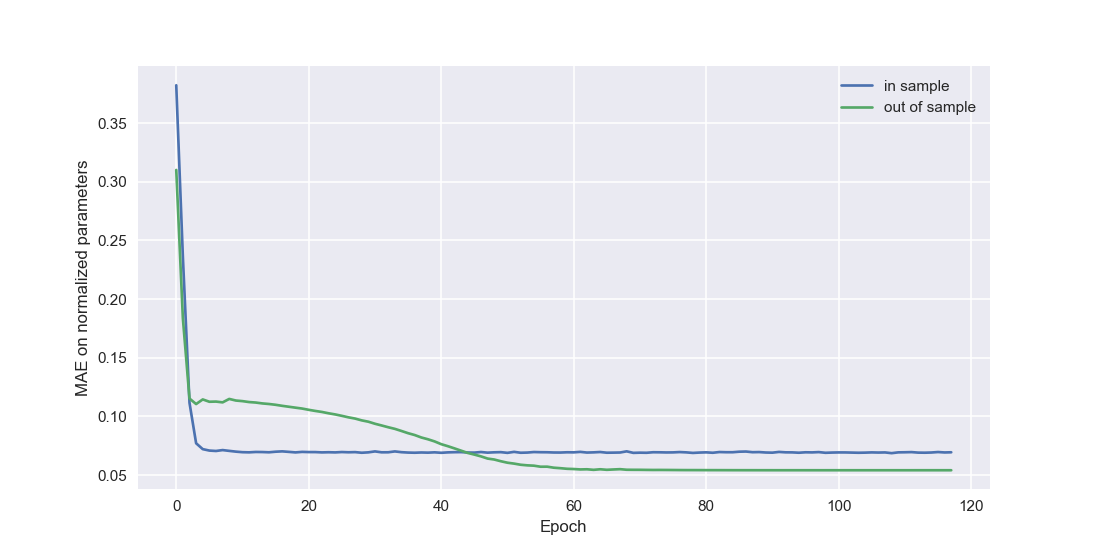

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize = (10,5))
ax.plot( train_hist.history["loss"], label = "in sample" )
ax.plot( train_hist.history["val_loss"], label = "out of sample" )
ax.set_xlabel("Epoch")
ax.set_ylabel("MAE on normalized parameters")
ax.legend()
# plt.savefig("./plots/training_development")
plt.show()

In [56]:
pred = model.predict(dataset['test']['x_scaled'])
MAE(pred - dataset['test']['y_scaled'])

9/9 [==============================] - 0s 8ms/step


0.056515446007679965

In [60]:
RMSE(pred - dataset['test']['y_scaled'])

0.07836744631541527

## Model Performance Measure

#### ✨【Key obervation】✨ 
##### Due to ConvLSTM2D's property, the model performs Better at long term prediction as the network require time to accumulate enough information and learn the underlying patterns in the data. 

#### - Defining Loss Functions (mae, mse, rmse)

In [109]:
# loss functions
MAE = lambda series: np.mean( abs(series) ) #  evaluate the model's performance in terms of the magnitude of the errors 
MAPE = lambda actual, predicted: np.mean(np.abs((actual - predicted) / actual)) * 100 # useful when dealing with data that has varying scales or units
MSE = lambda series: np.mean( series**2 ) #  penalize large errors in the model predictions
RMSE = lambda series: np.sqrt( np.mean( series**2 ) ) # compare the performance of different models with different scales of the target variable

#### - Defining both Predicted ATM_IV and Real ATM_IV with respect to its first due date

In [103]:
# pred ATM_VOL on the first due day
pred_ATM_Vol = []
for trad_day in pred:
    first_due = trad_day[0]
    pred_ATM_Vol.append(first_due[-1])
pred_ATM_Vol = np.array(pred_ATM_Vol)

# real ATM_VOL on the first due day
real_ATM_Vol = []
full_y_test = dataset['test']['y_scaled']
for trad_day in full_y_test:
    first_due = trad_day[0]
    real_ATM_Vol.append(first_due[-1])
real_ATM_Vol = np.array(real_ATM_Vol)

#### - Set up Predicted and Real IV values and their Returns

In [270]:
ATM_df = pd.DataFrame()

ATM_df['pred'] = pred_ATM_Vol
ATM_df['pred+1'] = ATM_df['pred'].shift(-1)
ATM_df['pred_return'] = ATM_df['pred+1']/ATM_df['pred']
ATM_df['pred_return'] = np.log(ATM_df['pred_return'])

ATM_df['real'] = real_ATM_Vol
ATM_df['real+1'] = ATM_df['real'].shift(-1)
ATM_df['real_return'] = ATM_df['real+1']/ATM_df['real']
ATM_df['real_return'] = np.log(ATM_df['real_return'])

ATM_df['test_date'] = dataset["dates"]['test']

ATM_df = ATM_df.iloc[:-1,:]

## ___________________________________________________________________________

### 1. Prediction accuracy measure of ATM_VOL

In [266]:
print(f'The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAE(pred_ATM_Vol - real_ATM_Vol)}\n')
print(f'The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAPE(real_ATM_Vol, pred_ATM_Vol)}\n')
print(f'The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MSE(pred_ATM_Vol - real_ATM_Vol)}\n')
print(f'The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {RMSE(pred_ATM_Vol - real_ATM_Vol)}')

The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.033553601493898036

The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 8.546464107371088

The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.003874087621645808

The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.06224216915922683


<IPython.core.display.Javascript object>


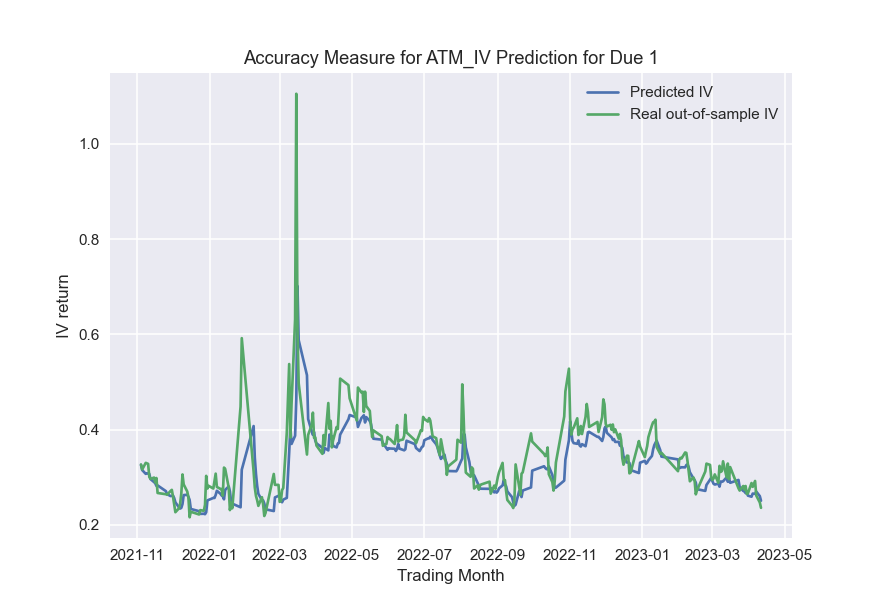

In [267]:
%matplotlib notebook
import matplotlib.pyplot as plt
gfg = sns.lineplot(x='test_date', y='pred', data=ATM_df, label='Predicted IV')
gfg = sns.lineplot(x='test_date', y='real', data=ATM_df, label='Real out-of-sample IV')
gfg.set_title( "Accuracy Measure for ATM_IV Prediction for Due 1")
gfg.set_xlabel( "Trading Month")
gfg.set_ylabel( "IV return")
plt.show()

#### As we can see from the graph,the model produces a higher accuracy on forecasting data further away from the current timestamp.

#### Measurement on the first 100 data 

In [389]:
print(f'The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAE(pred_ATM_Vol[:100] - real_ATM_Vol[:100])}\n')
print(f'The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAPE(real_ATM_Vol[:100], pred_ATM_Vol[:100])}\n')
print(f'The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MSE(pred_ATM_Vol[:100] - real_ATM_Vol[:100])}\n')
print(f'The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {RMSE(pred_ATM_Vol[:100] - real_ATM_Vol[:100])}')

The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.045731606425017855

The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 10.879656535889936

The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.00836587973931775

The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.09146518320824461


#### Measurement on the last 100 data

In [390]:
print(f'The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAE(pred_ATM_Vol[-100:] - real_ATM_Vol[-100:])}\n')
print(f'The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAPE(real_ATM_Vol[-100:], pred_ATM_Vol[-100:])}\n')
print(f'The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MSE(pred_ATM_Vol[-100:] - real_ATM_Vol[-100:])}\n')
print(f'The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {RMSE(pred_ATM_Vol[-100:] - real_ATM_Vol[-100:])}')

The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.027278119858535642

The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 7.308637732436235

The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.0014689609729648466

The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.03832702666480726


#### Measurement on the last 50 data

In [391]:
print(f'The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAE(pred_ATM_Vol[-50:] - real_ATM_Vol[-50:])}\n')
print(f'The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MAPE(real_ATM_Vol[-50:], pred_ATM_Vol[-50:])}\n')
print(f'The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {MSE(pred_ATM_Vol[-50:] - real_ATM_Vol[-50:])}\n')
print(f'The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is {RMSE(pred_ATM_Vol[-50:] - real_ATM_Vol[-50:])}')

The MAE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.019776733866795005

The MAPE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 6.055713747647834

The MSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.0006464549317229541

The RMSE of the 【Predicted ATM_VOL】 vs. 【Real ATM_VOL】 is 0.025425478003824314


#### ✨【Conclusion】✨ 
##### As we can see from the performance measure of the three data sample selected from the first 100, last 100, and last 50 respectively.
##### The first 100 underperforms comparing to the perfromance measure on the entire dataset, while the last 100 outperforms the full dataset  perfromance measure and the last 50 performs even better.
##### Therefore, we can conclude that our model produces a better accuracy for mid to long term maturities than short term maturity.

## ___________________________________________________________________________

### 2. Prediction accuracy measure of ATM_IV_return

In [268]:
print(f'The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAE(ATM_df["pred_return"] - ATM_df["real_return"])}\n')
print(f'The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAPE(ATM_df["real_return"], ATM_df["pred_return"])}\n')
print(f'The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MSE(ATM_df["pred_return"] - ATM_df["real_return"])}\n')
print(f'The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {RMSE(ATM_df["pred_return"] - ATM_df["real_return"])}')

The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.08429280151913159

The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 202.955949310623

The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.019128171031359074

The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.13830463127227186


<IPython.core.display.Javascript object>


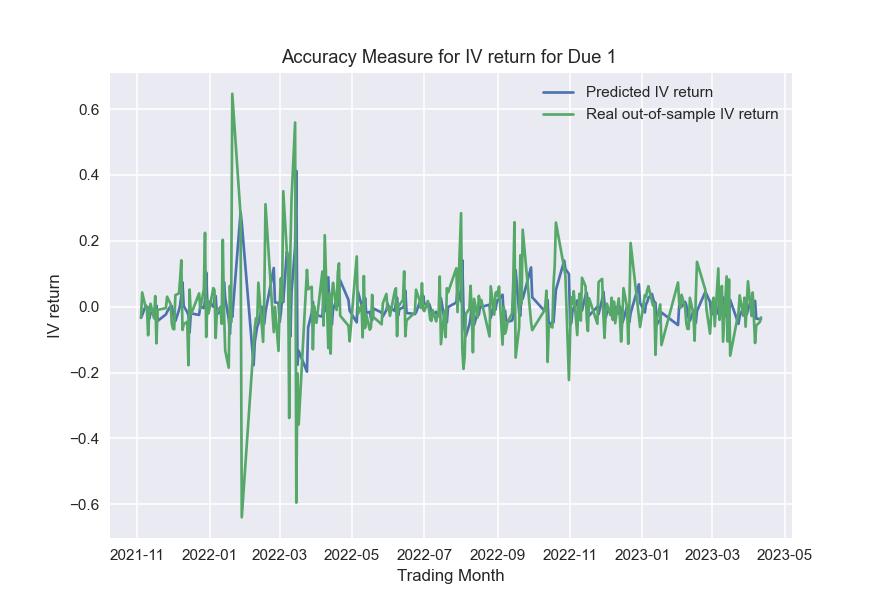

In [269]:
%matplotlib notebook
import matplotlib.pyplot as plt
gfg = sns.lineplot(x='test_date', y='pred_return', data=ATM_df, label='Predicted IV return')
gfg = sns.lineplot(x='test_date', y='real_return', data=ATM_df, label='Real out-of-sample IV return')
gfg.set_title( "Accuracy Measure for IV return for Due 1 ")
gfg.set_xlabel( "Trading Month")
gfg.set_ylabel( "IV return")
plt.show()

#### Now, let's see if our assumption from Part 1 still stand.

#### Measurement on the first 100 data

In [392]:
print(f'The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAE(ATM_df["pred_return"][:100] - ATM_df["real_return"][:100])}\n')
print(f'The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAPE(ATM_df["real_return"][:100], ATM_df["pred_return"][:100])}\n')
print(f'The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MSE(ATM_df["pred_return"][:100] - ATM_df["real_return"][:100])}\n')
print(f'The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {RMSE(ATM_df["pred_return"][:100] - ATM_df["real_return"][:100])}')

The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.11880112111888831

The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 227.06328479909152

The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.03975161288575464

The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.19937806520717027


#### Measurement on the last 100 data

In [393]:
print(f'The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAE(ATM_df["pred_return"][-100:] - ATM_df["real_return"][-100:])}\n')
print(f'The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAPE(ATM_df["real_return"][-100:], ATM_df["pred_return"][-100:])}\n')
print(f'The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MSE(ATM_df["pred_return"][-100:] - ATM_df["real_return"][-100:])}\n')
print(f'The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {RMSE(ATM_df["pred_return"][-100:] - ATM_df["real_return"][-100:])}')

The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.0637097399162787

The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 163.3932270147447

The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.006950683485229727

The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.08337075917388378


#### Measurement on the last 50 data

In [394]:
print(f'The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAE(ATM_df["pred_return"][-50:] - ATM_df["real_return"][-50:])}\n')
print(f'The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MAPE(ATM_df["real_return"][-50:], ATM_df["pred_return"][-50:])}\n')
print(f'The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {MSE(ATM_df["pred_return"][-50:] - ATM_df["real_return"][-50:])}\n')
print(f'The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is {RMSE(ATM_df["pred_return"][-50:] - ATM_df["real_return"][-50:])}')

The MAE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.059598858724474624

The MAPE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 169.16631798117325

The MSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.005735794586996984

The RMSE of the 【Predicted IV Return】 vs. 【Real IV Return】 is 0.07573502879775636


#### ✨【Conclusion】✨ 
##### The conclusion from Part I still stands as the performance measure for the last 50 data > the last 100 data > the first 100 data.
##### Therefore, we have solidified our conclusion that our model perfroms better for mid to long term maturities than short term maturity.

## ___________________________________________________________________________

### Calculate Win rate, PNL, and Avg. PNL based on return 

#### Win Rate

In [462]:
performance_df = ATM_df.loc[:,['pred_return', 'real_return']]
performance_df['same_sign'] = performance_df.apply(lambda x: (x['pred_return'] > 0) == (x['real_return'] > 0), axis=1)

In [464]:
print(f"The Win Rate based on model prediction is {performance_df['same_sign'].sum()/len(performance_df)}")

The Win Rate based on model prediction is 0.43416370106761565


#### AVG_PNL

In [466]:
performance_df['same_sign'] = (performance_df['same_sign'] * 2 - 1).astype(int)
performance_df['PNL'] = abs(performance_df['real_return'] ) * performance_df['same_sign']

In [468]:
print(f"The Average P&L based on model prediction is {performance_df['PNL'].sum()/len(performance_df)}")

The Average P&L based on model prediction is -0.007055796554072819


#### PL ratio

In [459]:
print(f"The total profit based on model prediction is {performance_df[performance_df['same_sign']==1]['PNL'].sum()}\n")
print(f"The total loss based on model prediction is {performance_df[performance_df['same_sign']==-1]['PNL'].sum()}\n")
print(f"The PL ratio is {abs(performance_df[performance_df['same_sign']==1]['PNL'].sum()/performance_df[performance_df['same_sign']==-1]['PNL'].sum())}\n")

The total profit based on model prediction is 9.602882608287944

The total loss based on model prediction is -11.585561439982406

The PL ratio is 0.8288664004791232



### 3. Autoregressive to calculate N Steps ahead: Our Model vs. Benchmark (Martingale)

In [314]:
def get_model_preds(model,
                    dataset,
                    steps_ahead = 1,
                    which : "str" = "test",
                    diff_target : "bool" = False):
        
    #dates
    dates = dataset["dates"][which]
    
    # predict
    inputs = dataset[which]["x"]
    scalers = dataset["scalers"]["x"]
    
    for i in range(steps_ahead): 
        
        scaled_inputs = scale_input(inputs,scalers)
        uscaled_pred = model.predict( scaled_inputs )

        # scale
        y_scaler = dataset["scalers"]["y"]
        scaled_target = scale_target( uscaled_pred, y_scaler, True )

        # correct if we predict differences
        if diff_target:
            scaled_target =+ dataset[which]["x"][:,-1,...,0]

        # adjust for no-arb bounds
        bounds = lambda preds: np.minimum( [1,1,1,1,1], np.maximum( [0,0,-1,0,-1], preds ) )
        scaled_target = bounds( scaled_target )
        
        inputs = np.concatenate( 
            (
                inputs[:,1:], # without the last observation
                scaled_target.reshape( (inputs.shape[0],1,*inputs.shape[2:]) ) # reshaped to input shape
            ),
            axis=1
        )
            
    # shape to df
    index = pd.MultiIndex.from_product( (dates, expiries) )
    columns = dataset["paramnames"]
    preds = pd.DataFrame( scaled_target.reshape( -1,5 ), index, columns )
    
    return preds

In [395]:
def SVI_series_to_smiles(param_timeseries,
                         strikerange = (-.2,.2),
                         n_strikes = 401):
    
    forward_log_moneyness = np.linspace( *strikerange,n_strikes )[...,None]
    sqrt_t = np.sqrt( param_timeseries.index.get_level_values(1).values / 255 )[None,]
    a,b,rho,sigma,m = param_timeseries.values.T  
    
    displacement = forward_log_moneyness - m
    curvature = np.sqrt( displacement**2 + sigma**2 )
    scaled_vol_smile = np.sqrt( ( a + b * ( rho * displacement + curvature ) ) )    
    
    bs_smile = scaled_vol_smile/sqrt_t
    
    return pd.DataFrame( bs_smile.T, index = param_timeseries.index, columns = forward_log_moneyness.squeeze() )

In [396]:
def evaluate_loss(predictions, 
                  param_timeseries = converted_df, 
                  loss = MAE ):
    
    # the dates for which we have predicted
    series_dates = predictions.index.unique(level=0)
    dates_of_prediction = series_dates[:-t_ahead] # we dont know the m last predictions' realizations
    dates_of_realization = series_dates[t_ahead:] # shift the dates forward
    
    pred_smiles = SVI_series_to_smiles( predictions )
    realized_smiles = SVI_series_to_smiles( param_timeseries )    
    
    # To see if they are parametric - naive strategy
    errors = pred_smiles.loc[dates_of_prediction] - realized_smiles.loc[dates_of_realization].values
    return errors.groupby( axis=0, level=1 ).apply( loss ).mean(1)

In [397]:
lossname = "MAE"
loss = MAE if lossname == "MAE" else RMSE

t_aheads = [1,3,5,10,20,30]

losses = pd.DataFrame()
for t_ahead in t_aheads:

    OOS_preds = get_model_preds( model, dataset, t_ahead, "test", diff_target )
    oos_dates = OOS_preds.index.levels[0]
    OOS_naive_loss = evaluate_loss(converted_df.loc[oos_dates],loss=MAE)
    OOS_pred_loss = evaluate_loss(OOS_preds,loss=loss)
    relative_loss = OOS_pred_loss - OOS_naive_loss
    relative_loss.name = "t+{} {}".format(t_ahead,lossname)
    losses = pd.concat( [losses, relative_loss], axis = 1 )

9/9 [==============================] - 0s 7ms/step


In [398]:
losses

,t+1 MAE,t+3 MAE,t+5 MAE,t+10 MAE,t+20 MAE,t+30 MAE
1,0.157865,0.070832,0.015117,-0.017969,-0.058176,-0.068765
2,0.157592,0.122900,0.098585,0.057176,0.012200,0.041902
3,0.037223,0.016983,0.003745,-0.022532,-0.037873,-0.053002
